# Working with Rubin CCDVisit Table Data

In this notebook we look at how we can import data from the Rubin CCDVisit table such as [DP1](https://dp1.lsst.io/products/index.html) or DP2 (coming soon).

Note that the lsst packages are not installed as part of the default LightCurveLynx installation. Users will need to manually install them via in order to run this notebook (e.g. `pip install lsst-rsp`)

## Get the Visits Table

Users will need to download the CCDVisits table. Here we use the parquet version of the [DP1 ccdvisits table on LSDB.io](https://data.lsdb.io/hats/dp1/). This notebook assumes the table has been downloaded to a local directory.

In [1]:
import pandas as pd

filename = "../../../data/opsim/dp1_ccdvisit.parquet"
survey_data = pd.read_parquet(filename)
survey_data.head()

,ccdVisitId,expMidptMJD,ra,dec,band,skyRotation,magLim,seeing,skyBg,skyNoise,pixelScale,xSize,ySize,zeroPoint
0,1145019888896,60623.258521,53.004536,-28.190331,i,102.799379,24.1963,0.864554,1425.880005,40.683998,0.200343,4071,3999,31.839001
1,1145019888897,60623.258521,53.064355,-27.961231,i,102.799379,24.2392,0.823865,1422.500000,37.339401,0.200280,4071,3999,31.838699
2,1145019888898,60623.258521,53.123909,-27.731684,i,102.799379,24.2087,0.844020,1418.369995,39.185101,0.200342,4071,3999,31.836599
3,1145019888899,60623.258521,53.264695,-28.242508,i,102.799379,24.1806,0.859669,1425.849976,39.428398,0.200274,4071,3999,31.837999
4,1145019888900,60623.258521,53.323752,-28.013505,i,102.799379,24.2486,0.808050,1424.319946,39.147900,0.200218,4071,3999,31.839100


## Creating the ObsTable

The `LSSTObsTable` class includes a method for building an `ObsTable` directly from a Rubin CCDVisists table.  It includes the schemas for both DP1 and DP2 data.

In [2]:
from lightcurvelynx.obstable.lsst_obstable import LSSTObsTable

obs_table = LSSTObsTable.from_ccdvisit_table(survey_data)

This means that the function will automatically handle translating the column names to those expected by LightCurveLynx. By comparing the column names, we can see some of the renaminings (e.g. "band" -> "filter")

In [3]:
cols1 = set(obs_table.columns.tolist())
cols2 = set(survey_data.columns.tolist())

print("Columns dropped from survey_data to obs_table:")
print(cols2 - cols1)

print("Columns added to obs_table from defaults or calculations:")
print(cols1 - cols2)

Columns dropped from survey_data to obs_table:
{'skyBg', 'expMidptMJD', 'magLim', 'skyRotation', 'pixelScale', 'zeroPoint', 'skyNoise', 'band'}
Columns added to obs_table from defaults or calculations:
{'sky_noise', 'sky_bg_adu', 'zp_mag', 'zp', 'rotation', 'maglim', 'filter', 'time', 'pixel_scale'}


We can plot the footprint of the survery using the `plot_footprint` function.

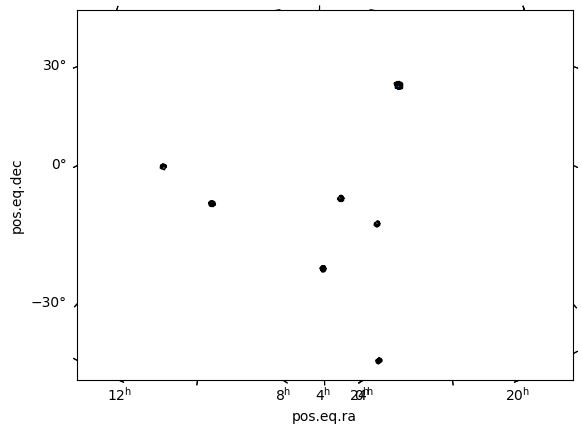

In [4]:
obs_table.plot_footprint()

## Conclusion

The `OpsSim` created from the visits table can be used like any other `ObsTable`.